<a href="https://colab.research.google.com/github/vishakhaghete16/Python/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix1.csv')

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.dtypes


,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [5]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.shape

(8790, 10)

In [8]:
data = data.drop_duplicates()

In [12]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


<ipython-input-13-b44fa1fadcd8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=data['type'], ax=axes[0], palette='Set2')


Text(0.5, 0.98, 'Total Content on Netflix')

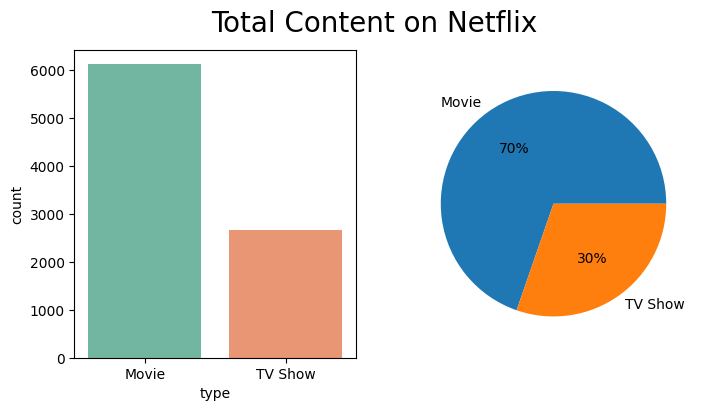

In [13]:
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0], palette='Set2')
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [14]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [15]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count',
 ascending=False)

In [16]:
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


Text(0.5, 0.98, 'Rating on Netflix')

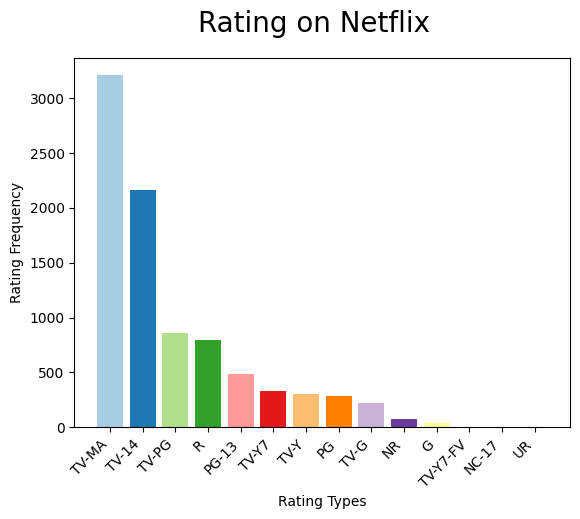

In [17]:
# Generate a set of colors based on the length of unique ratings
colors = plt.cm.Paired(range(len(ratings)))

plt.bar(ratings['rating'], ratings['count'], color=colors)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")

plt.suptitle('Rating on Netflix', fontsize=20)


Text(0.5, 0.98, 'Rating on Netflix')

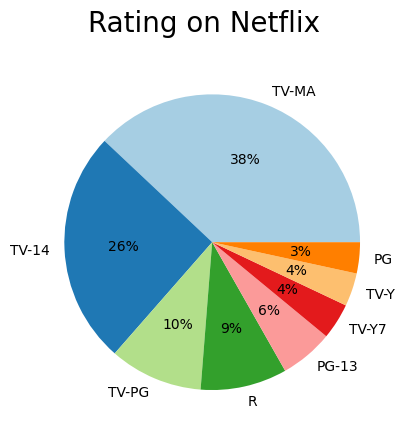

In [19]:
 # Generate a color map for the pie chart
colors = plt.cm.Paired(range(8))

# Create a pie chart with colors
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=colors)

plt.suptitle('Rating on Netflix', fontsize=20)

In [20]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [21]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [22]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


In [23]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [24]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Iran,1
West Germany,1
Greece,1


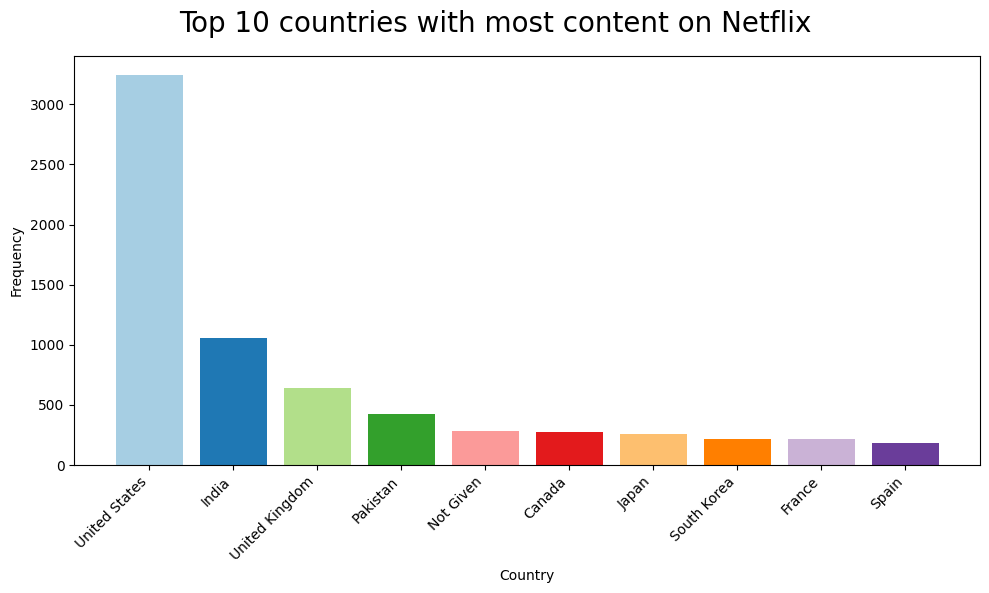

In [25]:
# Get the top 10 countries with the most content
top_ten_countries = data['country'].value_counts().reset_index().head(10)
top_ten_countries.columns = ['country', 'count']

# Generate a color map for the bars
colors = plt.cm.Paired(range(len(top_ten_countries)))

# Create a bar chart with colors
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color=colors)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels
plt.xlabel("Country")
plt.ylabel("Frequency")

# Add a title
plt.suptitle("Top 10 countries with most content on Netflix", fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

In [27]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24


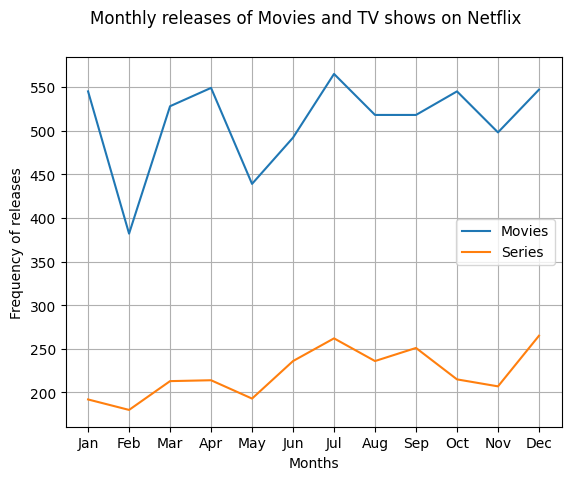

In [35]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

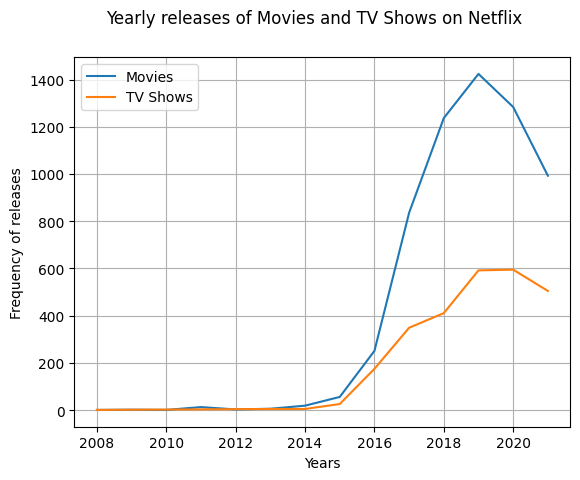

In [31]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

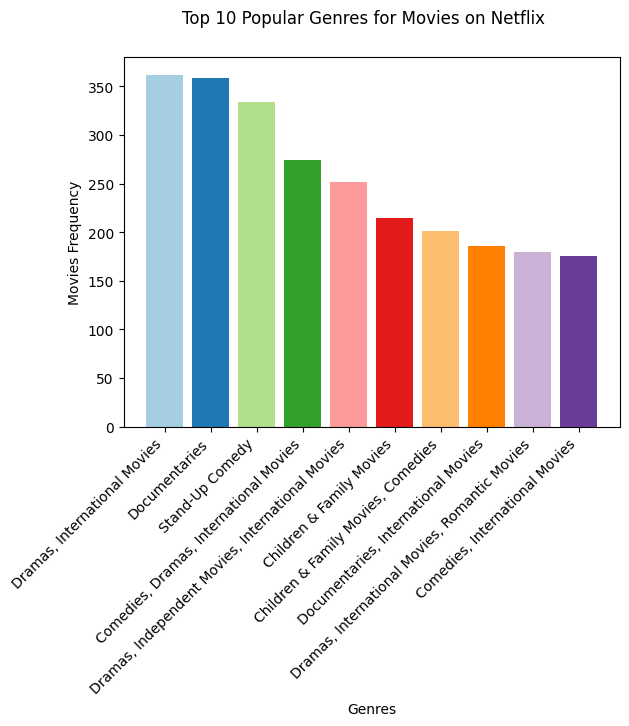

In [36]:
# Top 10 popular movie genres
popular_movie_genre = data[data['type'] == 'Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
# Top 10 popular series genres
popular_series_genre = data[data['type'] == 'TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

# Create colors using a colormap
colors = plt.cm.Paired(range(len(popular_movie_genre)))

# Create the bar plot for popular movie genres
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 Popular Genres for Movies on Netflix")

plt.show()

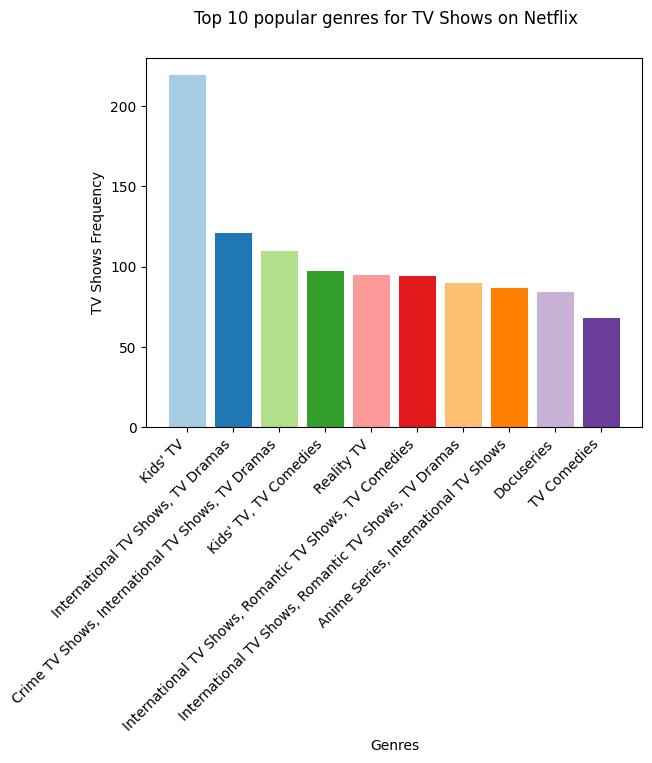

In [39]:
plt.bar(popular_series_genre.index, popular_series_genre.values,color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

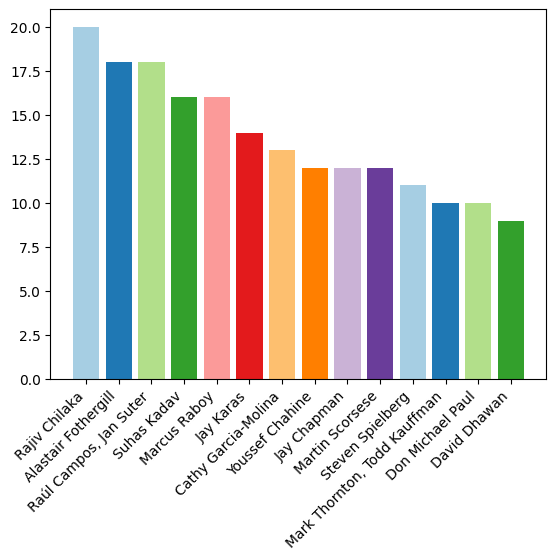

In [40]:
directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
plt.bar(directors['director'], directors['count'], color=colors)
plt.xticks(rotation=45, ha='right')